In [1]:
import pandas as pd

In [3]:
df= pd.read_csv('results.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1682437781870,30,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,271,300,1,1,http://localhost:3001/Parser?schemaId=1,30,0,1
1,1682437781906,6,HTTP Request,400,Bad Request,Thread Group 1-1,text,False,NaN,339,291,1,1,http://localhost:3001/Parser?schemaId=2,6,0,0
2,1682437783069,16,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,271,300,1,1,http://localhost:3001/Parser?schemaId=1,16,0,0
3,1682437783107,6,HTTP Request,400,Bad Request,Thread Group 1-1,text,False,NaN,339,291,1,1,http://localhost:3001/Parser?schemaId=2,6,0,0
4,1682437784270,9,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,271,300,1,1,http://localhost:3001/Parser?schemaId=1,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,1682438355750,8,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,271,300,1,1,http://localhost:3001/Parser?schemaId=1,8,0,0
5601,1682438355833,5,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,271,291,1,1,http://localhost:3001/Parser?schemaId=2,5,0,0
5602,1682438355878,6,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,271,300,1,1,http://localhost:3001/Parser?schemaId=1,6,0,0
5603,1682438355954,6,HTTP Request,200,OK,Thread Group 1-1,text,True,NaN,271,291,1,1,http://localhost:3001/Parser?schemaId=2,6,0,0


In [20]:
df2 = df.loc[:5603, [0,3,4]]
df2[3] = pd.to_numeric(df2[3])
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5604 entries, 0 to 5603
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5604 non-null   int64 
 1   3       5604 non-null   int64 
 2   4       5604 non-null   object
dtypes: int64(2), object(1)
memory usage: 131.5+ KB


In [22]:
df2[3] == 400

0       False
1        True
2       False
3        True
4       False
        ...  
5599    False
5600    False
5601    False
5602    False
5603    False
Name: 3, Length: 5604, dtype: bool

In [25]:
df2['errorCount'] = df2.apply(lambda x: df2[(df2[0] < x[0]) & (df2[3] == 400)][0].count(), axis=1)
df2['okCount'] = df2.apply(lambda x: df2[(df2[0] < x[0]) & (df2[3] == 200)][0].count(), axis=1)
df2

,0,3,4,errorCount,okCount
0,1682437781870,200,OK,0,0
1,1682437781906,400,Bad Request,0,1
2,1682437783069,200,OK,1,1
3,1682437783107,400,Bad Request,1,2
4,1682437784270,200,OK,2,2
...,...,...,...,...,...
5599,1682438355688,200,OK,214,5385
5600,1682438355750,200,OK,214,5386
5601,1682438355833,200,OK,214,5387
5602,1682438355878,200,OK,214,5388


In [41]:
df2["errRate"] = df2["errorCount"] / df2["okCount"] * 100
df2

,0,3,4,errorCount,okCount,successRate,errRate
0,1682437781870,200,OK,0,0,NaN,NaN
1,1682437781906,400,Bad Request,0,1,0.000000,0.000000
2,1682437783069,200,OK,1,1,100.000000,100.000000
3,1682437783107,400,Bad Request,1,2,50.000000,50.000000
4,1682437784270,200,OK,2,2,100.000000,100.000000
...,...,...,...,...,...,...,...
5599,1682438355688,200,OK,214,5385,3.974002,3.974002
5600,1682438355750,200,OK,214,5386,3.973264,3.973264
5601,1682438355833,200,OK,214,5387,3.972526,3.972526
5602,1682438355878,200,OK,214,5388,3.971789,3.971789


In [42]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [43]:
pdf = df2.loc[1:,[0,'errRate']]
pdf[0] = pd.to_datetime(pdf[0])


In [44]:
pdf.rename(columns={0:'date'}, inplace=True)
pdf.set_index('date',inplace=True)
pdf

,errRate
date,
1970-01-01 00:28:02.437781906,0.000000
1970-01-01 00:28:02.437783069,100.000000
1970-01-01 00:28:02.437783107,50.000000
1970-01-01 00:28:02.437784270,100.000000
1970-01-01 00:28:02.437784308,66.666667
...,...
1970-01-01 00:28:02.438355688,3.974002
1970-01-01 00:28:02.438355750,3.973264
1970-01-01 00:28:02.438355833,3.972526


C:\Users\julio.MSI\AppData\Local\Temp\ipykernel_27484\1196669581.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0.019472658564814813, 0, '28:02.437700'),
 Text(0.019472659722222223, 0, '28:02.437800'),
 Text(0.01947266087962963, 0, '28:02.437900'),
 Text(0.01947266203703704, 0, '28:02.438000'),
 Text(0.019472663194444444, 0, '28:02.438100'),
 Text(0.01947266435185185, 0, '28:02.438200'),
 Text(0.01947266550925926, 0, '28:02.438300'),
 Text(0.019472666666666666, 0, '28:02.438400')]

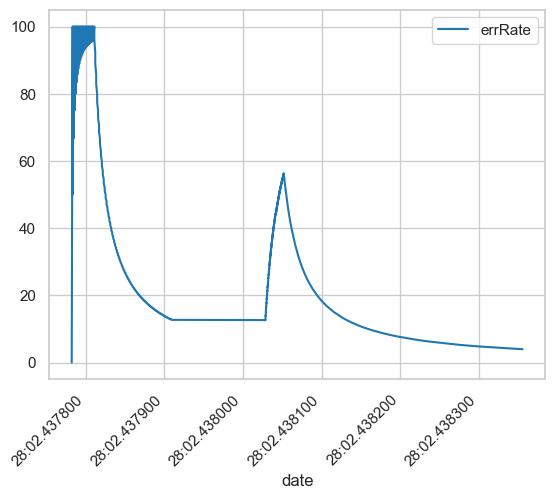

In [48]:
g = sns.lineplot(data=pdf, palette="tab10")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')